# **LazImpa**

*Mathieu Rita*



_______________
**INTRODUCTION**

This notebook shows how to run the experiments from the paper: *“LazImpa”: Lazy and Impatient neural agents learn to communicate efficiently*. WIth this notebook, you will be able to reproduce the results shown in the paper. By default, we set here a small input space (`n_features=100`) such that an experiment can be run in a few hours on Google Colab.

The notebook is organized in 3 sections:

- I- Clone LazImpa repository and set the environment
- II- Train LazImpa
- III- Analyse results.

_________________

## I - Clone LazImpa repository and set the environment

___________________

In this section, clone LazImpa GitHub repository and set the environment with the correct architecture. In order to save the useful data during the training you have to choose a directory name (ex: `dir_save`) in which all the training data will be saved and create it with the following organization:

|_ `dir_save`

|___ `messages`

|___ `accuracy`

|___ `sender`

|___ `receiver`

Then, for analysis, create a directory in which all the analytical data will be saved (ex: `analysis`)

Eventually, import some functions that will be used for the analysis.
___________________

In [ ]:
# Clone repository
! git clone https://github.com/clement-bonnet/Lazimpa.git
! mv "./Lazimpa/egg" "./egg"
! mv "./Lazimpa/example" "./example"

Cloning into 'Lazimpa'...
remote: Enumerating objects: 9929, done.
remote: Total 9929 (delta 0), reused 0 (delta 0), pack-reused 9929
Receiving objects: 100% (9929/9929), 988.19 MiB | 31.79 MiB/s, done.
Resolving deltas: 100% (8498/8498), done.
Checking out files: 100% (12397/12397), done.


In [ ]:
# Create the useful directory for training and analysis

! mkdir -p dir_save/{accuracy,messages,sender,receiver} # dir_save is the saving directory name
! mkdir analysis

In [ ]:

# Useful functions (for analysis)
import numpy as np
import matplotlib.pyplot as plt

def load_message(expe):
  """
  Load messages stored during training procedure/
  Return numpy array with all the messages
  """
  np_load_old = np.load
  messages = np.load(expe,allow_pickle=True)
  np.load = np_load_old
  return messages

def img2gif(img_dir,output_file):
  """
  Transform a folder of images (img_dir) into a gif and save it with name output_file
  """
  ! pip install images2gif
  import glob
  from PIL import Image

  # filepaths
  import os
  files = os.listdir(img_dir)
  files = [ _ for _ in files if ".png" in _ ]
  files = [int((_.split("test"))[1].split(".")[0]) for _ in files]
  files.sort()
  fp_in= [img_dir+"/test"+str(_)+".png" for _ in files]
  fp_out = output_file

  img, *imgs = [Image.open(f).resize((800,200)) for f in fp_in]
  img.save(fp=fp_out, format='GIF', append_images=imgs,
          save_all=True, duration=60, loop=0)

## II - Train LazImpa

____________________
In this section we propose the code to train agents. Here we put the Hparams to run LazImpa. *If you want to test other agents model shown in the paper, change the parameters `impatient` and `reg`. You can also play with the other H-parameters*


**Data saved:**

Current messages and accuracy by input are saved at each training episode in `dir_save/messages` and `dir_save/accuracy` and the weights of the agents are saved every 50 epochs in `dir_save/sender` and `dir_save/receiver`.
_____________________

## Old loss - No impatient

In [ ]:
#We have to put epoch number to 101 so that the receiver_weights100.pth will be saved ;)
#Good job!
! python -m egg.zoo.channel.train --dir_save=dir_save \
                                  --impatient=False \
                                  --reg=False \
                                  --vocab_size=40 \
                                  --max_len=30 \
                                  --n_features=100 \
                                  --print_message=False \
                                  --random_seed=7 \
                                  --probs="powerlaw" \
                                  --n_epoch=101 \
                                  --batch_size=512 \
                                  --length_cost=100. \
                                  --sender_cell="lstm" \
                                  --receiver_cell="lstm" \
                                  --sender_hidden=250 \
                                  --receiver_hidden=600 \
                                  --receiver_embedding=100 \
                                  --sender_embedding=10 \
                                  --batches_per_epoch=100 \
                                  --lr=0.001 \
                                  --sender_entropy_coeff=2. \
                                  --sender_num_layers=1 \
                                  --receiver_num_layers=1 \
                                  --early_stopping_thr=0.99

/usr/bin/python3: Error while finding module specification for 'egg.zoo.channel.train' (ModuleNotFoundError: No module named 'egg')


## Old loss - Impatient

In [ ]:
#We have to put epoch number to 101 so that the receiver_weights100.pth will be saved ;)
! python -m egg.zoo.channel.train --dir_save=dir_save \
                                  --impatient=True \
                                  --reg=True \
                                  --vocab_size=40 \
                                  --max_len=30 \
                                  --n_features=100 \
                                  --print_message=False \
                                  --random_seed=7 \
                                  --probs="powerlaw" \
                                  --n_epoch=501 \
                                  --batch_size=512 \
                                  --length_cost=0. \
                                  --sender_cell="lstm" \
                                  --receiver_cell="lstm" \
                                  --sender_hidden=250 \
                                  --receiver_hidden=600 \
                                  --receiver_embedding=100 \
                                  --sender_embedding=10 \
                                  --batches_per_epoch=100 \
                                  --lr=0.001 \
                                  --sender_entropy_coeff=2. \
                                  --sender_num_layers=1 \
                                  --receiver_num_layers=1 \
                                  --early_stopping_thr=0.99

/usr/bin/python3: Error while finding module specification for 'egg.zoo.channel.train' (ModuleNotFoundError: No module named 'egg')


## New loss -NAD phonotactic

In [ ]:
#We have to put epoch number to 101 so that the receiver_weights100.pth will be saved ;)
! python -m egg.zoo.channel.train_new_loss  --dir_save=dir_save \
                                            --impatient=False \
                                            --reg=True \
                                            --vocab_size=40 \
                                            --max_len=30 \
                                            --n_features=100 \
                                            --print_message=True \
                                            --random_seed=7 \
                                            --probs="powerlaw" \
                                            --n_epoch=501 \
                                            --batch_size=512 \
                                            --length_cost=0. \
                                            --sender_cell="lstm" \
                                            --receiver_cell="lstm" \
                                            --sender_hidden=250 \
                                            --receiver_hidden=600 \
                                            --receiver_embedding=100 \
                                            --sender_embedding=10 \
                                            --batches_per_epoch=100 \
                                            --lr=0.001 \
                                            --sender_entropy_coeff=2. \
                                            --sender_num_layers=1 \
                                            --receiver_num_layers=1 \
                                            --early_stopping_thr=0.99 \
                                            --lambda_nad=0.1

/usr/bin/python3: Error while finding module specification for 'egg.zoo.channel.train_new_loss' (ModuleNotFoundError: No module named 'egg')


In [ ]:
!zip -r /content/dir_save_not_impatient_nad_1e-1.zip /content/dir_save

  adding: content/dir_save/ (stored 0%)
  adding: content/dir_save/messages/ (stored 0%)
  adding: content/dir_save/receiver/ (stored 0%)
  adding: content/dir_save/accuracy/ (stored 0%)
  adding: content/dir_save/sender/ (stored 0%)


## III- Analyze the results

________________________
In this section, we propose some insights to analyze the training: 

- 1. In the first subsection, we run the code lines that allow to reproduce the tests presented in the paper. 

- 2. Then, in the second subsection, we propose a few useful plots to analyze the tests.
____________________________

### III.1. Perform the analytical tests

In [ ]:
#Fixed for NAD loss: set n_features = 300 instead of 100 (OR set n_features = 100 during training)
! python -m egg.zoo.channel.test --impatient=True --save_dir="analysis/" --receiver_weights="dir_save/receiver/receiver_weights100.pth" --sender_weights="dir_save/sender/sender_weights100.pth" --vocab_size=40  --max_len=30 --n_features=100 --sender_cell="lstm" --receiver_cell="lstm" --sender_hidden=250 --receiver_hidden=600 --receiver_embedding=100 --sender_embedding=10 --sender_num_layers=1 --receiver_num_layers=1

/usr/bin/python3: Error while finding module specification for 'egg.zoo.channel.test' (ModuleNotFoundError: No module named 'egg')


In [ ]:
#Fixed for NAD loss: set n_features = 300 instead of 100 (OR set n_features = 100 during training)
! python -m egg.zoo.channel.position_analysis --save_dir="analysis/" --impatient=True --sender_weights="dir_save/sender/sender_weights100.pth" --receiver_weights="dir_save/receiver/receiver_weights100.pth" --vocab_size=40 --n_features=100 --max_len=30 --sender_cell="lstm" --receiver_cell="lstm" --sender_hidden=250 --receiver_hidden=600 --receiver_embedding=100 --sender_embedding=10 --sender_num_layers=1 --receiver_num_layers=1

/usr/bin/python3: Error while finding module specification for 'egg.zoo.channel.position_analysis' (ModuleNotFoundError: No module named 'egg')


### III-2. Analytical plots

**0. Number of consonent clusters:** Count number of consonent clusters of size 2 and 3 for each message

In [ ]:
# Choose epochs (between 0 and 500)
epochs=[1,90,100]

for epoch in epochs:
  # Load messages
  messages=load_message("dir_save/messages/messages_"+str(epoch)+".npy")

  # Construct the length distribution
  clstr2=[] #count number of clsuters of size 2
  clstr3=[] #count number of clsuters of size 3
  
  for message in messages:
    ct2 = 0
    ct3 = 0
    for i in range(len(message)-2):
      # segment of size 2
      segment1 = message[i:i+2] 
      if (int(segment1[0]) < 27) and (int(segment1[1]) < 27):
        ct2 += 1
      
      # segment of size 3
      segment2 = message[i:i+3]
      if (int(segment2[0]) < 27) and (int(segment2[1]) < 27) and (int(segment2[2]) < 27):
        ct3 += 1

    # side case of size 2
    if len(message) > 1:
      if (int(message[-2]) < 27) and (int(message[-1]) < 27):
        ct2 += 1
    
    clstr2.append(ct2)
    clstr3.append(ct3)

  # Add epoch to plot
  plt.figure(1)
  plt.plot(clstr2,label="Epoch "+str(epoch))

  plt.figure(2)
  plt.plot(clstr3,label="Epoch "+str(epoch))

# Plot fig
plt.figure(1)
plt.title("Number of consonent clusters of size 2 as a function of inputs ranked by frequency")
plt.xlabel("Inputs ranked by frequency")
plt.ylabel("clusters of size 2")
plt.xlim((0,100))
plt.ylim((0,32))
plt.legend()

plt.figure(2)
plt.title("Number of consonent clusters of size 3 as a function of inputs ranked by frequency")
plt.xlabel("Inputs ranked by frequency")
plt.ylabel("clusters of size 3")
plt.xlim((0,100))
plt.ylim((0,32))
plt.legend()

plt.show()

FileNotFoundError: ignored

**1. Length distribution for different epochs:** length distribution converges almost toward Optimal coding

In [ ]:
# Choose epochs (between 0 and 500)
epochs=[1,50,90,95,100]

for epoch in epochs:
  # Load messages
  messages=load_message("dir_save/messages/messages_"+str(epoch)+".npy")

  # Construct the length distribution
  length_distribution=[]
  for message in messages:
    length_distribution.append(len(message))

  # Add epoch to plot
  plt.plot(length_distribution,label="Epoch "+str(epoch))

# Plot fig
plt.title("Message length as a function of inputs ranked by frequency")
plt.xlabel("Inputs ranked by frequency")
plt.ylabel("Message length")
plt.xlim((0,100))
plt.ylim((0,32))
plt.legend()
plt.show()

**2. Accuracy evolution**

In [ ]:
# Get accuracy
accuracy=[]
for i in range(1,100):
  accuracy.append(np.mean(np.load("dir_save/accuracy/accuracy_"+str(i)+".npy")))

# Plot fig
fig, ax = plt.subplots(1, 1, figsize=(11,4))
ax.plot(accuracy,label="LazImpa",c="tab:blue")
ax.set_title("Accuracy evolution")
ax.set_xlabel("Training episodes")
ax.set_ylabel("Accuracy")
ax.set_xlim((0,500))
ax.set_ylim((0,1))

plt.show()

**3. Mean length evolution**

In [ ]:
mean_length_evolution=[]

for epoch in range(100):
  # Load messages
  messages=load_message("dir_save/messages/messages_"+str(epoch)+".npy")

  # Construct the length distribution
  length_distribution=[]
  for message in messages:
    length_distribution.append(len(message))
  
  # Get the mean length
  mean_length_evolution.append(np.mean(length_distribution))

# Plot fig
fig, ax = plt.subplots(1, 1, figsize=(11,4))
ax.plot(mean_length_evolution,label="LazImpa",c="tab:blue")
ax.set_title("Mean length evolution")
ax.set_xlabel("Training episodes")
ax.set_ylabel("Mean length")
ax.set_xlim((0,500))
ax.set_ylim((0,31))

plt.show()

**4. Accuracy = f(mean_length)**: co-evolution of the accuracy and mean message length: allow us to spot the beginning of the regularization (laziness)

In [ ]:
mean_length_evolution=[]
accuracy=[]

for epoch in range(100):
  # Load messages
  messages=load_message("dir_save/messages/messages_"+str(epoch)+".npy")

  # Construct the length distribution
  length_distribution=[]
  for message in messages:
    length_distribution.append(len(message))
  
  # Get the mean length
  mean_length_evolution.append(np.mean(length_distribution))

  # Get the accuracy
  accuracy.append(np.mean(np.load("dir_save/accuracy/accuracy_"+str(epoch)+".npy")))

# Plot fig
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.scatter(mean_length_evolution,accuracy,s=2.5)
ax.set_title("Accuracy= f(mean message length)")
ax.set_xlabel("Mean message length")
ax.set_ylabel("Accuracy")
ax.set_xlim((0,31))
ax.set_ylim((0,1))

plt.show()

**5. Position of informative symbols**: allows us to see where informative symbols are set within the messages

legend:
- yellow: uninformative ; 1: informative; purple: no symbol
- 1: uninformative ; 0: informative ; -1 no symbol

In [ ]:
# Color the matrix of "information test"
plt.matshow(np.load("analysis/position_sieve.npy"))
plt.xlabel("Position")
plt.ylabel("Message (ranked by frequency)")
plt.title("Position of informative symbols")
plt.show()

**6. Dynamic evolution of the training**: (takes a few minutes to run)

Create gif

In [ ]:
# Create gif
! mkdir images_dir

print("Create the images for gif")

accuracy_lazimpa=[]
mean_len_lazimpa=[]
accuracy_normal=[]
mean_len_normal=[]
accuracy_impatient=[]
mean_len_impatient=[]
accuracy_normreg=[]
mean_len_normreg=[]

for i in range(1,100):
  messages_lazimpa=load_message("dir_save/messages/messages_"+str(i)+".npy")

  L_lazimpa=[]

  for m in messages_lazimpa:
    L_lazimpa.append(len(m))
  
  mean_len_lazimpa.append(np.mean(L_lazimpa))
  accuracy_lazimpa.append(np.mean(np.load("dir_save/accuracy/accuracy_"+str(i)+".npy")))

  fig, axs = plt.subplots(1, 3, figsize=(11,4))
  axs[0].plot(L_lazimpa,label="LazImpa",c="tab:blue")
  axs[0].set_ylim((0,32))
  axs[0].set_xlabel("Input ranked by frequency")
  axs[0].set_ylabel("Message length") 
  axs[0].set_title("Length distribution") 

  axs[1].plot(accuracy_lazimpa,label="LazImpa",c="tab:blue")
  axs[1].set_xlabel("Training episodes")
  axs[1].set_ylabel("Accuracy")
  axs[1].set_title("Accuracy evolution")
  axs[1].set_xlim((0,500))
  axs[1].set_ylim((0,1))

  axs[2].plot(mean_len_lazimpa,label="LazImpa",c="tab:blue")
  axs[2].set_title("Mean length evolution")
  axs[2].set_xlabel("Training episodes")
  axs[2].set_ylabel("Mean message length")
  axs[2].set_xlim((0,500))
  axs[2].set_ylim((0,32))

  fig.tight_layout(pad=2.5)

  fig.suptitle("Episode "+str(i)) 
  plt.savefig("images_dir/test"+str(i)+".png")
  plt.close() 

print("Start creating gif for messages")
img2gif("images_dir","analysis/training_dynamic.gif")

! rm -rf images_dir

Display it:

In [ ]:
print("Display gif")
from IPython.display import Image

with open('analysis/training_dynamic.gif','rb') as f:
    display(Image(data=f.read(), format='png'))

! rm -rf images_dir

# Phonotactic model


## Phonotactic literature


# Here are some papers I found, both on universal phonotactics and on English:

http://roa.rutgers.edu/files/420-0900/roa-420-morelli-2.pdf

Universal:
-Early Ll clusters and how they relate to universal phonotactic constraints.(Dziubalska-Kolaczyk,1999; http://www.internationalphoneticassociation.org/icphs-proceedings/ICPhS1999/papers/p14_0317.pdf)

Main thoughts and importance for us:

C-V pairings are universally preferred, deriving directly from the figure-and-ground principle, clarity of perception and ease of articulation functions of phonology,and the principle of leas teffort. The CV-preference,if alone,would prevent the occurrence of any consonant clusters at all. Clusters,in order to survive,must be sustained by some force counteracting the overwhelming tendency to reduce towards CVs. This force is sonority.

-NP Extension: B&B Phonotactics.(Dziubalska-Kolaczyk, 2009; https://www.degruyter.com/document/doi/10.2478/v10010-009-0011-9/html)

Main thoughts and importance for us:
The allowed clusters, other than C-V (which is the preference), are given by:

Net Auditory Distance Principle: NAD = |MOA| + |POA| + |Lx|, where MOA, POA and Lx are the absolute
values of differences in the Manner of Articulation, Place of Articulation and Voicing of the neighbouring sounds, respectively.

Normally, they're written as preferences: 
NAD (C1,C2) ≥ NAD (C2,V)
The preference reads: “In word-initial double clusters, the Net Auditory Distance (NAD) between the two consonants should be greater than or equal to the Net Auditory
Distance between a vowel and a consonant neighbouring on it.". Let us now define two Net Auditory Distances between the sounds (C1,C2) and (C2,V)
where
– C1 (MOA1, POA1, Lx1)
– C2 (MOA2, POA2, Lx2)
– V (MOA3, Lx3)

The values for the computation NAD = |MOA| + |POA| + |Lx| are taken from the table below:

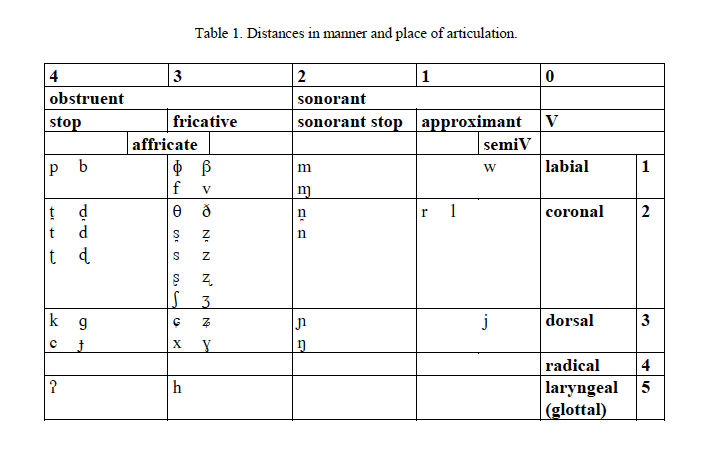
In English: 
- Explaining phonotactics using NAD (Dziubalska-Kołaczyk,2014;https://www.sciencedirect.com/science/article/pii/S0388000114000448)

Table to use in English for phonotactics: 

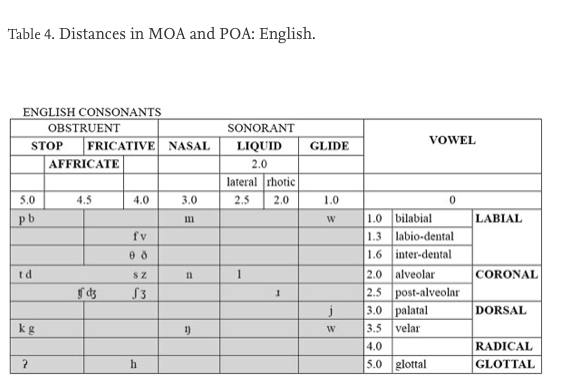

She also describes a phonotaictic calculator (I need to find it but maybe it has some more specific information and/or a code!), example of preferences that we could integrate in our list of preferences, and examples of the analyses to do with the data.
For the paper: there is a great figure here explaining the explanatory model of Natural Linguistics (the papers we read did the higher principles, we intend to do the next level: preferences)


Specifically in English:
https://repozytorium.amu.edu.pl/bitstream/10593/10000/1/WA_Dziubalska-Kołaczyk_Phonotactics%20of%20consonant%20clusters%20in%20the%20history%20of%20English.pdf

Research idea: to advance the field of computational linguistics and within the scope of Natural Phonology and Natural Linguistics, add these constraints to both the speaker and the listener to see whether the time is less than without. We'll test this with the dataset in English. 
Future directions: However, phonology alone does not fully account for clusters. Inflection, word-formation and compounding contribute to the creation of consonant clusters to an extent relative to a morphological type of a language. Therefore, a phonotactic grammar operates on basic, non-derived, lexical forms, while morphonotactics takes care of the remaining, morphologically complex, forms. Interaction between phonotactics and morphonotactics provides a richer insight into the understanding of cluster complexity(Dziubalska-Kołaczyk,2014).


In [ ]:
# Cleaner
Cs = [
    (5,1), #C1
    (5,1), #C2
    (5,2), #C3
    (5,2), #C4          
    (5,3.5) #C5
    (5,3.5), #C6
    (5,5), #C7
    (4.5,2.5), #C8
    (4.5,2.5), #C9
    (4,1.3), #C10
    (4,1.3), #C11
    (4,1.6), #C12
    (4,1.6), #C13
    (4,2), #C14
    (4,2), #C15
    (4,2.5), #C16
    (4,2.5), #C17
    (4,5), #C18
    (3,1), #C19
    (3,2), #C20
    (3,3.5), #C21
    (2.5,2), #C22
    (2,2.5), #C23
    (1,1), #C24
    (1,3), #C25
    (1,3.5), #C26
    (0,0), #C27
    (0,0), #C28
    (0,0), #C29
    (0,0), #C30
    (0,0), #C31
    (0,0), #C32
    (0,0), #C33
    (0,0), #C34
    (0,0), #C35
    (0,0), #C36
    (0,0), #C37
    (0,0), #C38
    (0,0), #C39
    (0,0), #C40
]


def NAD(message):
    """alpha, which is the alphabet length, is to be 40 (what they used for their
    previous experiment), with 26 consonants (taken from the paper with the table
    above and https://books.google.fr/books?hl=es&lr=&id=ALJKvQWP8FAC&oi=fnd&pg=PR13&dq=english+phoneme+inventory&ots=k7ZW05iRap&sig=jDPloSLrBLZ_kmNSJ96S5vHyS1A&redir_esc=y#v=onepage&q=english%20phoneme%20inventory&f=false)
    and 14 vowels
    """


    # consonant values have the structure (a,b), with a being the manner of
    # articulation and b being the place of articulation. The ones that are the
    # same are voiced and unvoiced pairs
    Cs = []

    C1=(5,1)
    Cs.append(C1)
    C2=(5,1)
    Cs.append(C2)
    C3=(5,2)
    Cs.append(C3)
    C4=(5,2)
    Cs.append(C4)
    C5=(5,3.5)
    Cs.append(C5)
    C6=(5,3.5)
    Cs.append(C6)
    C7=(5,5)
    Cs.append(C7)
    C8=(4.5,2.5)
    Cs.append(C8)
    C9=(4.5,2.5)
    Cs.append(C9)
    C10=(4,1.3)
    Cs.append(C10)
    C11=(4,1.3)
    Cs.append(C11)
    C12=(4,1.6)
    Cs.append(C12)
    C13=(4,1.6)
    Cs.append(C13)
    C14=(4,2)
    Cs.append(C14)
    C15=(4,2)
    Cs.append(C15)
    C16=(4,2.5)
    Cs.append(C16)
    C17=(4,2.5)
    Cs.append(C17)
    C18=(4,5)
    Cs.append(C18)
    C19=(3,1)
    Cs.append(C19)
    C20=(3,2)
    Cs.append(C20)
    C21=(3,3.5)
    Cs.append(C21)
    C22=(2.5,2)
    Cs.append(C22)
    C23=(2,2.5)
    Cs.append(C23)
    C24=(1,1)
    Cs.append(C24)
    C25=(1,3)
    Cs.append(C25)
    C26=(1,3.5)
    Cs.append(C26)
    # Vowels have a value of 0
    C27=0
    C28=0
    C29=0
    C30=0
    C31=0
    C32=0
    C33=0
    C34=0
    C35=0
    C36=0
    C37=0
    C38=0
    C39=0
    C40=0

    # =====
    # I dont know if this is true but I set key and value to 0 for vowels,
    # since we need both of them when computing NAD
    # =====
    Cs = Cs + 14*[(0,0)]




    #Goal is to get these preferences: 
    #C1C2V
    #NAD (C1,C2) ≥ NAD (C2,V)

    #VC1C2
    #NAD (V,C1) ≤ NAD (C1,C2)

    #V1C1C2V2
    #NAD (V1,C1) ≥ NAD (C1,C2) < NAD (C2,V2)

    #*NAD (C1,C2) > 0

    #C1C2C3V
    #NAD (C1,C2) < NAD (C2,C3) ≥ NAD (C3,V)

    #VC1C2C3
    #NAD (V,C1) ≤ NAD (C1,C2) > NAD (C2,C3)

    #V1C1C2C3V2
    #NAD (V,C1) ≥ NAD (C1,C2) & NAD (C2,C3) < (C3,V2)

    #Calculation:
    #NAD CC = |(MOA1 − MOA2)| + |(POA1 − POA2)|
    #NAD CV = |MOA1 − MOA2|
    #e.g., prV in Polish
    #pr: |(MOA1 − MOA2)| + |(POA1 − POA2)|
    #|5 − 2| + |1 − 2.3| = |3| + |1.3| = 4.3
    #so, NAD CC = 4.3
    #rV: |MOA1 − MOA2| = |2 − 0| = 2
    #NAD CV = 2
    #so, NAD CC − NAD CV = 2.3
    #so, the preference NAD (C1,C2) ≥ NAD (C2,V) is observed since 4.3. > 2.3

    # iterate through the message (but need to make sure that it takes 15 as 15
    # and not 1 and 5, is there anything else to add to do that?): done!
    letters=[]
    for i in range(len(message)):
        print("letter ", i, ": ", message[i])
        letters.append(message[i])

    word_nad=[]
    for j in range(len(letters)):
        if j==0:
            continue
        else:

            # =====
            # Two adjacent letters
            # =====
            letter1 = letters[j-1]
            letter2 = letters[j]

            # =====
            # indexes of keys and values
            # =====
            key = 0
            value = 1

            #the idea with C1[keys] is to get the keys from above that matches
            #the i, can you help too? haha) done!
            #calculated from NAD(CC)=|(MOA1 − MOA2)| + |(POA1 − POA2)|
            
            # ======
            # Here i just called NAD(letters[k,j]) "nad" which is just a
            # variable, because otherwise it will be mistaken with the name of
            # the function itself and would be considered a recursive function
            # ======
            
            # if (letter1 < 26) and (letter2 < 26):  #The case when the two
            # letters are consonents
            
            #   nad = abs(Cs[letter1][key]-Cs[letter2][key]) + abs(Cs[letter1][value]-Cs[letter2][value])
            
            # else: #if at least one of them is a vowel
            
            #   nad = abs(Cs[letter1][key]-Cs[letter2][key])
            
            # word_nad.append(nad)

        #I think we need to encode the preferences as well otherwise it's not going to make sense because the important thing is not the value, it's whether the value is > or < than another value
        #So maybe we can say something like: if in the first two letters: NAD (C1,C2) IS NOT ≥ NAD (C2,V) (i.e. the contrary to the preference), add 1, do this for all the preferences and add the total score, then penalize by the higher score
        #I'm not sure where to introduce this, but it would be something like: if nad[0]>nad[1]

            # ======
            # attempt: enforcing NAD(C1,C2) = max(NAD(C1,V),NAD(C2,V)) + 1
            # ======

            if (letter1 < 26) and (letter2 < 26):  #The case when the two letters are consonents
            
                nad = abs(Cs[letter1][key]-Cs[letter2][key]) + abs(Cs[letter1][value]-Cs[letter2][value])

                #Now before going further verify the preferences profile and enforce NAD(C1,C2) = max(NAD(C1,V),NAD(C2,V)) + 1 (V doesnt matter which as they all have MOA = 0)

                # Compute NAD(C1,V) and NAD(C2,V) with V=35 a random vowel
                nad_C1V = abs(Cs[letter1][key]-Cs[35][key])
                nad_C2V = abs(Cs[letter2][key]-Cs[35][key])

                if (nad <= nad_C1V) or (nad <= nad_C2V):
                    m = max(nad_C1V, nad_C2V)
                    nad = nad + (m - nad + 1) 
           #shouldn't the line below be less indented?     
            else: #if at least one of them is a vowel
                
                nad = abs(Cs[letter1][key]-Cs[letter2][key])
            
            word_nad.append(nad)

    return sum(word_nad)/len(word_nad)

    #return None

In [ ]:
# =====
#example: the score of CCV is bigger which is not expected i guess (need to specify formula for CV in the above function i think)
# =====

message = [4,15,6,27,3]
score = NAD(message)
print("average score: ", score)

CC = [4,15]
score_CC = NAD(CC)
print("average score CC: ", score_CC)

CV = [4,37]
score_CV = NAD(CV)
print("average score CV: ", score_CV)

# Phonems co-occurence based on english corpus

Dataset dowloaded from: \\
https://www.kaggle.com/jrobischon/wikipedia-movie-plots

In [ ]:
!git clone https://github.com/mathformoso/LazImpa.git

Cloning into 'LazImpa'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

Entrées du dictionnaire:: \\
co_occurence: matrice 84x84 des co_occurences d'un phoneme donné dans un voisinage de longueur 1 dans le corpus de texte. \\
keys: list des phonemes (ordre des lignes et colonnes de la matrice co_occurences \\
occurrences: nb d'apparitions d'un phoneme donné dans le corpus. \\
Note: les occurences sont triées par fréquence d'apparition

In [ ]:
pickle_in = open("./LazImpa/data.pkl","rb")
example_dict = pickle.load(pickle_in)
print(example_dict['co_occurences'])
print(example_dict['occurences'])
print(example_dict['keys'])

[[0.01172636 0.02363043 0.3232946  ... 0.         0.         0.        ]
 [0.02700895 0.02007398 0.08877153 ... 0.         0.         0.        ]
 [0.53198117 0.12780136 0.02163906 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(827196, 723723, 502702, 483139, 448927, 311407, 281084, 276143, 250281, 246972, 201915, 194400, 183039, 157596, 157432, 156262, 140036, 133893, 130956, 130655, 123137, 118943, 110139, 105357, 99767, 98797, 91318, 80769, 73019, 70063, 51910, 51638, 37381, 30504, 27987, 12784, 7045, 1843, 1166, 872, 536, 63, 61, 53, 35, 34, 34, 31, 28, 13, 12, 12, 7, 7, 7, 7, 5, 4, 4, 4, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)
('ə', 'ɪ', 'r', 'n', 't', 's', 'l', 'd', 'i', 'z', 'k', 'm', 'ɛ', 'ð', 'h', 'a', 'e', 'b', 'p', 'f', 'ʊ', 'æ', 

##English analysis

Text(0.5, 1.0, 'Top 38 phonems frequencies in english')

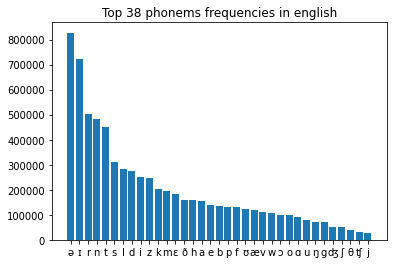

In [ ]:
cut = 35
plt.bar(x = example_dict['keys'][:cut], height = example_dict['occurences'][:cut])
plt.title('Top 38 phonems frequencies in english')

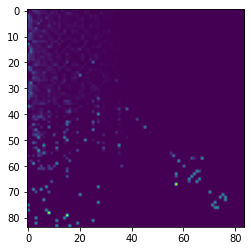

In [ ]:
plt.imshow(example_dict['co_occurences'])

In [ ]:
Cs_list = [
    (5,1), #C1
    (5,1), #C2
    (5,2), #C3
    (5,2), #C4          
    (5,3.5), #C5
    (5,3.5), #C6
    (5,5), #C7
    (4.5,2.5), #C8
    (4.5,2.5), #C9
    (4,1.3), #C10
    (4,1.3), #C11
    (4,1.6), #C12
    (4,1.6), #C13
    (4,2), #C14
    (4,2), #C15
    (4,2.5), #C16
    (4,2.5), #C17
    (4,5), #C18
    (3,1), #C19
    (3,2), #C20
    (3,3.5), #C21
    (2.5,2), #C22
    (2,2.5), #C23
    (1,1), #C24
    (1,3), #C25
    (1,3.5), #C26
    (0,0), #C27
    (0,0), #C28
    (0,0), #C29
    (0,0), #C30
    (0,0), #C31
    (0,0), #C32
    (0,0), #C33
    (0,0), #C34
    (0,0), #C35
    (0,0), #C36
    (0,0), #C37
    (0,0), #C38
    (0,0), #C39
    (0,0), #C40
]

print(len(Cs_list))


40


In [ ]:
#map2 from phonems to groups
keys = example_dict['keys']
map2 = [('ə', 18), ('ɪ', 18), ('r', 14), ('n', 11), ('t', 1), ('s', 7), ('l', 13), ('d',1), ('i',18), ('z',7), ('k',2), ('m',10), ('ɛ',18),
        ('ð',6), ('h',9), ('a', 18), ('e', 18), ('b', 0),('p', 0), ('f', 5), ('ʊ', 18), ('æ', 18), ('v',5), ('w',15),('ɔ',18),('o',18),
        ('ɑ',18),('u',18),('ŋ',12),('g', 2),('ʤ',4),('ʃ',8),('θ',6),('ʧ',4),('j',16),('ʒ',8), ('r_',3), ('w_',17)]
dmap2 = {}
for e in map2:
    dmap2[e[0]] = e[1]

In [ ]:
str_keys = []
for i in range(19):
    str = ""
    for tup in map2:
        if tup[1] == i:
            str+=tup[0]+'.'
    str_keys.append(str[:-1])
str_keys = np.array(str_keys)
print(str_keys)

['b.p' 't.d' 'k.g' 'r_' 'ʤ.ʧ' 'f.v' 'ð.θ' 's.z' 'ʃ.ʒ' 'h' 'm' 'n' 'ŋ' 'l'
 'r' 'w' 'j' 'w_' 'ə.ɪ.i.ɛ.a.e.ʊ.æ.ɔ.o.ɑ.u']


In [ ]:
phonems = np.array(example_dict['keys'][:cut])
print(phonems)

['ə' 'ɪ' 'r' 'n' 't' 's' 'l' 'd' 'i' 'z' 'k' 'm' 'ɛ' 'ð' 'h' 'a' 'e' 'b'
 'p' 'f' 'ʊ' 'æ' 'v' 'w' 'ɔ' 'o' 'ɑ' 'u' 'ŋ' 'g' 'ʤ' 'ʃ' 'θ' 'ʧ' 'j']


In [ ]:
grps = np.array([dmap2[f] for f in phonems])
print(grps)
grps_keys = np.unique(grps)
print(grps_keys)

[18 18 14 11  1  7 13  1 18  7  2 10 18  6  9 18 18  0  0  5 18 18  5 15
 18 18 18 18 12  2  4  8  6  4 16]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 18]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 <a list of 19 Text major ticklabel objects>)

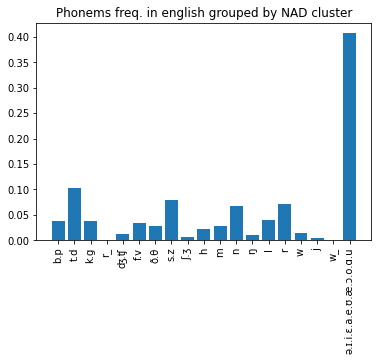

In [ ]:
tmp = np.array( example_dict['occurences'][:cut] )
n = np.sum(tmp)
data = np.array( [np.sum(tmp[grps == i]) for i in range(19)] )
plt.bar(x = str_keys, height = data/n)
plt.title('Phonems freq. in english grouped by NAD cluster')
plt.xticks(rotation=90)

([<matplotlib.axis.YTick at 0x7ff40324cf10>,
 [Text(0, 0, 'b.p'),
  Text(0, 0, 't.d'),
  Text(0, 0, 'k.g'),
  Text(0, 0, 'r_'),
  Text(0, 0, 'ʤ.ʧ'),
  Text(0, 0, 'f.v'),
  Text(0, 0, 'ð.θ'),
  Text(0, 0, 's.z'),
  Text(0, 0, 'ʃ.ʒ'),
  Text(0, 0, 'h'),
  Text(0, 0, 'm'),
  Text(0, 0, 'n'),
  Text(0, 0, 'ŋ'),
  Text(0, 0, 'l'),
  Text(0, 0, 'r'),
  Text(0, 0, 'w'),
  Text(0, 0, 'j'),
  Text(0, 0, 'w_'),
  Text(0, 0, 'ə.ɪ.i.ɛ.a.e.ʊ.æ.ɔ.o.ɑ.u')])

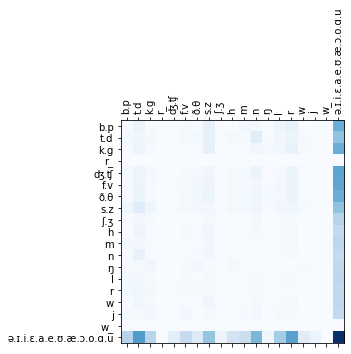

In [ ]:
tmp = example_dict['co_occurences'][:cut,:cut]
data = np.zeros((19,19))
for i in range(19):
    for j in range(19):
        hslice = np.sum(tmp[grps == i,:], axis = 0)
        vslice = np.sum(hslice[grps == j])
        data[i,j] = vslice
plt.matshow(data, cmap=plt.cm.Blues)
plt.xticks(np.arange(19), str_keys, rotation=90)
plt.yticks(np.arange(19), str_keys)
#plt.title('Co-occurences in english grouped by NAD cluster')

([<matplotlib.axis.YTick at 0x7ff40318e510>,
 [Text(0, 0, 'b.p'),
  Text(0, 0, 't.d'),
  Text(0, 0, 'k.g'),
  Text(0, 0, 'r_'),
  Text(0, 0, 'ʤ.ʧ'),
  Text(0, 0, 'f.v'),
  Text(0, 0, 'ð.θ'),
  Text(0, 0, 's.z'),
  Text(0, 0, 'ʃ.ʒ'),
  Text(0, 0, 'h'),
  Text(0, 0, 'm'),
  Text(0, 0, 'n'),
  Text(0, 0, 'ŋ'),
  Text(0, 0, 'l'),
  Text(0, 0, 'r'),
  Text(0, 0, 'w'),
  Text(0, 0, 'j'),
  Text(0, 0, 'w_')])

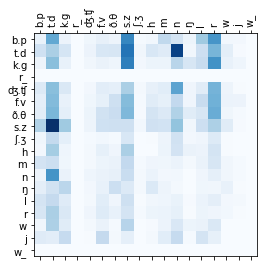

In [ ]:
tmp = example_dict['co_occurences'][:cut,:cut]
data = np.zeros((18,18))
for i in range(18):
    for j in range(18):
        hslice = np.sum(tmp[grps == i,:], axis = 0)
        vslice = np.sum(hslice[grps == j])
        data[i,j] = vslice
plt.matshow(data, cmap=plt.cm.Blues)
plt.xticks(np.arange(18), str_keys, rotation=90)
plt.yticks(np.arange(18), str_keys)

##NAD no impatient analysis

In [ ]:
messages = np.load('Lazimpa/experiments/dir_save_not_impatient_nad_1e-2/messages/messages_500.npy', allow_pickle=True)
print(messages)
print(len(messages))

[array([0]) array([32,  0]) array([37,  0]) array([39, 12,  0])
 array([28,  9,  0]) array([37, 37,  0]) array([37, 32,  0])
 array([37,  9,  0]) array([37, 13,  0]) array([37, 28,  0])
 array([30,  0]) array([22,  0]) array([31, 22,  0]) array([37, 30,  0])
 array([27,  0]) array([27, 20,  0]) array([12,  0]) array([ 3, 32,  0])
 array([3, 3, 0]) array([19,  8,  0]) array([35, 22,  0]) array([36,  0])
 array([19, 28,  0]) array([21, 13,  0]) array([23, 15,  0])
 array([14,  0]) array([8, 4, 0]) array([16, 13,  3,  0])
 array([35,  3,  0]) array([11, 20,  0]) array([28,  0])
 array([17,  4,  0]) array([11,  0]) array([36, 36,  0])
 array([15, 32,  0]) array([35, 32,  0]) array([16, 26,  0])
 array([15,  3,  0]) array([3, 9, 0]) array([17,  0])
 array([23, 15, 32,  0]) array([ 3, 26,  0]) array([ 3, 15,  0])
 array([17, 28,  0]) array([31, 13,  0]) array([ 3, 28,  0])
 array([33, 18,  0]) array([22, 22,  0]) array([14, 12,  0])
 array([15, 26,  0]) array([26, 33,  0]) array([17, 30,  0]

In [ ]:
#cluster consonants and vowels
#map1 from symbols to groups
idx, grp = 0, -1
aset = set()
map1 = []
for tup in Cs_list:
    if tup not in aset:
        grp+=1
    map1.append((idx,grp))
    idx+=1
    aset.add(tup)

dmap1 = {}
for e in map1:
    dmap1[e[0]] = e[1]
print(dmap1)

{0: 0, 1: 0, 2: 1, 3: 1, 4: 2, 5: 2, 6: 3, 7: 4, 8: 4, 9: 5, 10: 5, 11: 6, 12: 6, 13: 7, 14: 7, 15: 8, 16: 8, 17: 9, 18: 10, 19: 11, 20: 12, 21: 13, 22: 14, 23: 15, 24: 16, 25: 17, 26: 18, 27: 18, 28: 18, 29: 18, 30: 18, 31: 18, 32: 18, 33: 18, 34: 18, 35: 18, 36: 18, 37: 18, 38: 18, 39: 18}


In [ ]:
#translate messages to group ids
translated_messages = []
for m in messages:
    translated_messages.append( [ dmap1[l] for l in m] )
print(translated_messages)

[[0], [18, 0], [18, 0], [18, 6, 0], [18, 5, 0], [18, 18, 0], [18, 18, 0], [18, 5, 0], [18, 7, 0], [18, 18, 0], [18, 0], [14, 0], [18, 14, 0], [18, 18, 0], [18, 0], [18, 12, 0], [6, 0], [1, 18, 0], [1, 1, 0], [11, 4, 0], [18, 14, 0], [18, 0], [11, 18, 0], [13, 7, 0], [15, 8, 0], [7, 0], [4, 2, 0], [8, 7, 1, 0], [18, 1, 0], [6, 12, 0], [18, 0], [9, 2, 0], [6, 0], [18, 18, 0], [8, 18, 0], [18, 18, 0], [8, 18, 0], [8, 1, 0], [1, 5, 0], [9, 0], [15, 8, 18, 0], [1, 18, 0], [1, 8, 0], [9, 18, 0], [18, 7, 0], [1, 18, 0], [18, 10, 0], [14, 14, 0], [7, 6, 0], [8, 18, 0], [18, 18, 0], [9, 18, 0], [4, 13, 0], [12, 18, 18, 0], [1, 9, 0], [6, 2, 0], [2, 0], [18, 4, 0], [3, 4, 0], [7, 18, 0], [1, 18, 0], [6, 4, 0], [12, 18, 0], [15, 4, 0], [7, 9, 0], [9, 18, 0], [5, 18, 0], [12, 15, 18, 0], [10, 18, 18, 0], [9, 12, 1, 0], [2, 18, 0], [3, 2, 0], [8, 18, 0], [1, 2, 17, 0], [4, 18, 0], [9, 18, 8, 0], [7, 18, 2, 0], [4, 2, 0], [5, 7, 0], [7, 5, 9, 0], [18, 2, 0], [4, 6, 0], [2, 18, 0], [18, 1, 0], [7, 7,

In [ ]:
mean_len = 0
for m in translated_messages:
    mean_len += len(m)
mean_len = mean_len / len(translated_messages)
print(mean_len)

3.06


### Translate encoded messages to phonems

In [ ]:
#from groups to phonems
inverse_dict = {}
for tup in map2:
    if tup[1] not in inverse_dict:
        inverse_dict[tup[1]] = [tup[0]]
    else:
        inverse_dict[tup[1]].append(tup[0])

print(inverse_dict)

{18: ['ə', 'ɪ', 'i', 'ɛ', 'a', 'e', 'ʊ', 'æ', 'ɔ', 'o', 'ɑ', 'u'], 14: ['r'], 11: ['n'], 1: ['t', 'd'], 7: ['s', 'z'], 13: ['l'], 2: ['k', 'g'], 10: ['m'], 6: ['ð', 'θ'], 9: ['h'], 0: ['b', 'p'], 5: ['f', 'v'], 15: ['w'], 12: ['ŋ'], 4: ['ʤ', 'ʧ'], 8: ['ʃ', 'ʒ'], 16: ['j'], 3: ['r_'], 17: ['w_']}


In [ ]:
#translate messages to phonems (random taken if choice):
translated = []
for m in translated_messages:
    str = ""
    for l in m:
        rl = np.random.choice(inverse_dict[l])
        str+=rl
        translated.append(str)
print(translated)

['b', 'ɔ', 'ɔp', 'ɛ', 'ɛp', 'ə', 'əð', 'əðp', 'ɑ', 'ɑv', 'ɑvp', 'ɪ', 'ɪə', 'ɪəb', 'ə', 'əa', 'əab', 'ɛ', 'ɛf', 'ɛfp', 'ɔ', 'ɔs', 'ɔsp', 'ɑ', 'ɑə', 'ɑəb', 'o', 'op', 'r', 'rp', 'o', 'or', 'orp', 'ɛ', 'ɛɪ', 'ɛɪp', 'ə', 'əb', 'i', 'iŋ', 'iŋp', 'θ', 'θp', 'd', 'dɔ', 'dɔp', 'd', 'dd', 'ddb', 'n', 'nʤ', 'nʤp', 'u', 'ur', 'urp', 'ɔ', 'ɔb', 'n', 'nɪ', 'nɪb', 'l', 'lz', 'lzb', 'w', 'wʒ', 'wʒb', 's', 'sb', 'ʤ', 'ʤg', 'ʤgp', 'ʃ', 'ʃs', 'ʃsd', 'ʃsdp', 'ɔ', 'ɔt', 'ɔtp', 'θ', 'θŋ', 'θŋb', 'æ', 'æp', 'h', 'hg', 'hgp', 'θ', 'θb', 'e', 'eɪ', 'eɪp', 'ʃ', 'ʃɑ', 'ʃɑb', 'ɑ', 'ɑu', 'ɑup', 'ʃ', 'ʃʊ', 'ʃʊp', 'ʃ', 'ʃd', 'ʃdp', 'd', 'df', 'dfb', 'h', 'hb', 'w', 'wʒ', 'wʒʊ', 'wʒʊb', 'd', 'dɑ', 'dɑp', 'd', 'dʒ', 'dʒp', 'h', 'hə', 'həp', 'ə', 'əs', 'əsb', 'd', 'də', 'dəp', 'u', 'um', 'ump', 'r', 'rr', 'rrb', 'z', 'zð', 'zðb', 'ʒ', 'ʒə', 'ʒəb', 'ʊ', 'ʊʊ', 'ʊʊp', 'h', 'hɛ', 'hɛb', 'ʧ', 'ʧl', 'ʧlb', 'ŋ', 'ŋʊ', 'ŋʊə', 'ŋʊəb', 't', 'th', 'thb', 'ð', 'ðk', 'ðkb', 'g', 'gp', 'u', 'uʧ', 'uʧb', 'r_', 'r_ʤ', 'r_ʤp', 's', 's

###plot histograms

In [ ]:
#Counts groups occurrences
groups_keys = np.arange(19)
occurrences = {}
for m in translated_messages:
    for l in m:
        if l in occurrences:
            occurrences[l] += 1
        else:
            occurrences[l] = 1

print(occurrences)

{0: 100, 18: 69, 6: 9, 5: 8, 7: 15, 14: 8, 12: 9, 1: 20, 11: 2, 4: 10, 13: 2, 15: 7, 8: 12, 2: 15, 9: 12, 10: 4, 3: 3, 17: 1}


[(0, 100), (1, 20), (2, 15), (3, 3), (4, 10), (5, 8), (6, 9), (7, 15), (8, 12), (9, 12), (10, 4), (11, 2), (12, 9), (13, 2), (14, 8), (15, 7), (17, 1), (18, 69)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 <a list of 18 Text major ticklabel objects>)

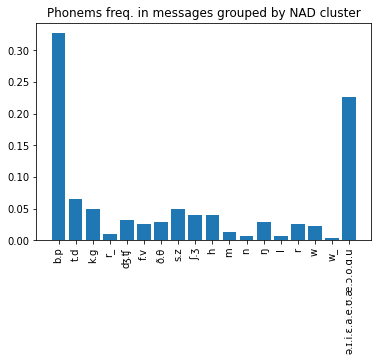

In [ ]:
lst = list(occurrences.items())
lst.sort(key = lambda x: x[0])
y = np.array([k[1] for k in lst])
x = np.array([k[0] for k in lst])
n = np.sum(y)
print(lst)
data = y
plt.bar(x = str_keys[x], height = data/n)
plt.title('Phonems freq. in messages grouped by NAD cluster')
plt.xticks(rotation=90)

In [ ]:
#Counts groups co-occurrences
counts = np.zeros(19)
counts[x] = y
cooccurrences = np.zeros((19,19))
for m in translated_messages:
    for j,l in enumerate(m):
        id = m[j]
        if j!=0:
            prev = m[j-1]
            cooccurrences[id,prev] +=1
        if j<len(m)-1:
            next = m[j+1]
            cooccurrences[id,next] +=1
cooccurrences /= np.expand_dims(counts+1e-5,-1)
print(cooccurrences.shape)

(19, 19)


([<matplotlib.axis.YTick at 0x7ff402fd6a90>,
 [Text(0, 0, 'b.p'),
  Text(0, 0, 't.d'),
  Text(0, 0, 'k.g'),
  Text(0, 0, 'r_'),
  Text(0, 0, 'ʤ.ʧ'),
  Text(0, 0, 'f.v'),
  Text(0, 0, 'ð.θ'),
  Text(0, 0, 's.z'),
  Text(0, 0, 'ʃ.ʒ'),
  Text(0, 0, 'h'),
  Text(0, 0, 'm'),
  Text(0, 0, 'n'),
  Text(0, 0, 'ŋ'),
  Text(0, 0, 'l'),
  Text(0, 0, 'r'),
  Text(0, 0, 'w'),
  Text(0, 0, 'j'),
  Text(0, 0, 'w_'),
  Text(0, 0, 'ə.ɪ.i.ɛ.a.e.ʊ.æ.ɔ.o.ɑ.u')])

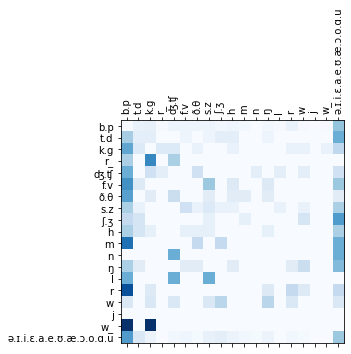

In [ ]:
plt.matshow(cooccurrences[:19,:19], cmap=plt.cm.Blues)
plt.xticks(np.arange(19), str_keys, rotation=90)
plt.yticks(np.arange(19), str_keys)

##Lazimpa analysis

In [ ]:
messages = np.load('Lazimpa/experiments/dir_save_impatient/messages/messages_500.npy', allow_pickle=True)
print(messages)
print(len(messages))

[array([0]) array([26,  0]) array([37, 37,  6,  0]) array([ 5, 37,  0])
 array([37, 37,  0]) array([37, 37, 37,  0]) array([37, 37, 35,  0])
 array([21, 36,  0]) array([37, 37, 22,  0]) array([37, 35,  0])
 array([37,  0]) array([22,  0]) array([37, 28,  0]) array([39, 10,  0])
 array([17,  0]) array([39, 36,  0]) array([ 9, 10,  0])
 array([39,  2,  0]) array([37,  6, 37,  0]) array([39, 36, 10,  0])
 array([24,  9,  0]) array([30,  0]) array([18, 20,  0])
 array([37,  2,  9,  0]) array([18, 16,  0]) array([39,  2,  2,  0])
 array([13,  0]) array([39, 39, 10,  0]) array([18,  0])
 array([39, 36,  9,  0]) array([18, 35, 35,  0]) array([39,  0])
 array([39, 18,  0]) array([37,  6, 16,  0]) array([39,  3, 10,  0])
 array([3, 2, 0]) array([ 3, 36,  0]) array([12, 36, 10,  0])
 array([37,  6, 28,  0]) array([24, 36,  0]) array([39,  9,  0])
 array([1, 4, 0]) array([39, 21, 37,  0]) array([8, 9, 0]) array([1, 0])
 array([38,  0]) array([37,  9, 22,  0]) array([18, 18, 18, 37,  0])
 array([3

In [ ]:
#translate messages to group ids
translated_messages = []
for m in messages:
    translated_messages.append( [ dmap1[l] for l in m] )
print(translated_messages)

[[0], [18, 0], [18, 18, 3, 0], [2, 18, 0], [18, 18, 0], [18, 18, 18, 0], [18, 18, 18, 0], [13, 18, 0], [18, 18, 14, 0], [18, 18, 0], [18, 0], [14, 0], [18, 18, 0], [18, 5, 0], [9, 0], [18, 18, 0], [5, 5, 0], [18, 1, 0], [18, 3, 18, 0], [18, 18, 5, 0], [16, 5, 0], [18, 0], [10, 12, 0], [18, 1, 5, 0], [10, 8, 0], [18, 1, 1, 0], [7, 0], [18, 18, 5, 0], [10, 0], [18, 18, 5, 0], [10, 18, 18, 0], [18, 0], [18, 10, 0], [18, 3, 8, 0], [18, 1, 5, 0], [1, 1, 0], [1, 18, 0], [6, 18, 5, 0], [18, 3, 18, 0], [16, 18, 0], [18, 5, 0], [0, 2, 0], [18, 13, 18, 0], [4, 5, 0], [0, 0], [18, 0], [18, 5, 14, 0], [10, 10, 10, 18, 0], [18, 1, 0], [10, 10, 0], [18, 18, 5, 0], [8, 0], [18, 1, 5, 0], [10, 10, 5, 0], [18, 14, 1, 0], [18, 7, 10, 0], [18, 1, 0], [1, 6, 18, 0], [10, 10, 10, 10, 0], [18, 10, 10, 0], [0, 18, 0], [10, 10, 10, 18, 0], [16, 5, 0], [9, 2, 15, 0], [18, 10, 5, 0], [18, 3, 18, 5, 0], [8, 18, 0], [0, 18, 5, 0], [18, 9, 1, 0], [18, 1, 0], [0, 5, 0], [10, 10, 18, 15, 0], [16, 0], [18, 9, 18, 0],

In [ ]:
mean_len = 0
for m in translated_messages:
    mean_len += len(m)
mean_len = mean_len / len(translated_messages)
print(mean_len)

3.4


###translate encoded messages to phonems

In [ ]:
#translate messages to phonems (random taken if choice):
translated = []
for m in translated_messages:
    str = ""
    for l in m:
        rl = np.random.choice(inverse_dict[l])
        str+=rl
        translated.append(str)
print(translated)

['b', 'o', 'ob', 'i', 'iʊ', 'iʊr_', 'iʊr_p', 'g', 'gɑ', 'gɑb', 'ɑ', 'ɑa', 'ɑab', 'ɛ', 'ɛu', 'ɛuə', 'ɛuəb', 'ɪ', 'ɪu', 'ɪuɑ', 'ɪuɑb', 'l', 'lɔ', 'lɔb', 'a', 'ae', 'aer', 'aerp', 'ɪ', 'ɪi', 'ɪib', 'a', 'ap', 'r', 'rp', 'ɔ', 'ɔi', 'ɔip', 'e', 'ev', 'evp', 'h', 'hp', 'a', 'aə', 'aəp', 'f', 'ff', 'ffb', 'ə', 'ət', 'ətb', 'ɪ', 'ɪr_', 'ɪr_o', 'ɪr_op', 'æ', 'æo', 'æov', 'æovb', 'j', 'jv', 'jvb', 'ə', 'əp', 'm', 'mŋ', 'mŋp', 'e', 'ed', 'edv', 'edvp', 'm', 'mʃ', 'mʃb', 'u', 'ut', 'utt', 'uttp', 'z', 'zp', 'ə', 'əe', 'əev', 'əevb', 'm', 'mp', 'ɛ', 'ɛo', 'ɛof', 'ɛofp', 'm', 'mɔ', 'mɔə', 'mɔəp', 'a', 'ap', 'o', 'om', 'omp', 'a', 'ar_', 'ar_ʃ', 'ar_ʃb', 'e', 'ed', 'edv', 'edvp', 't', 'tt', 'ttb', 'd', 'də', 'dəb', 'ð', 'ðu', 'ðuf', 'ðufp', 'ɑ', 'ɑr_', 'ɑr_ə', 'ɑr_əb', 'j', 'jɪ', 'jɪp', 'ɔ', 'ɔf', 'ɔfb', 'b', 'bg', 'bgp', 'ɛ', 'ɛl', 'ɛla', 'ɛlap', 'ʧ', 'ʧf', 'ʧfp', 'b', 'bp', 'u', 'up', 'ɔ', 'ɔv', 'ɔvr', 'ɔvrp', 'm', 'mm', 'mmm', 'mmma', 'mmmap', 'ɪ', 'ɪt', 'ɪtb', 'm', 'mm', 'mmp', 'æ', 'ææ', 'ææf', 

###plot histograms


In [ ]:
#Counts groups occurrences
groups_keys = np.arange(19)
occurrences = {}
for m in translated_messages:
    for l in m:
        if l in occurrences:
            occurrences[l] += 1
        else:
            occurrences[l] = 1

print(occurrences)

{0: 105, 18: 89, 3: 5, 2: 6, 13: 2, 14: 4, 5: 33, 9: 6, 1: 28, 16: 4, 10: 34, 12: 1, 8: 5, 7: 7, 6: 3, 4: 4, 15: 4}


[(0, 105), (1, 28), (2, 6), (3, 5), (4, 4), (5, 33), (6, 3), (7, 7), (8, 5), (9, 6), (10, 34), (12, 1), (13, 2), (14, 4), (15, 4), (16, 4), (18, 89)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

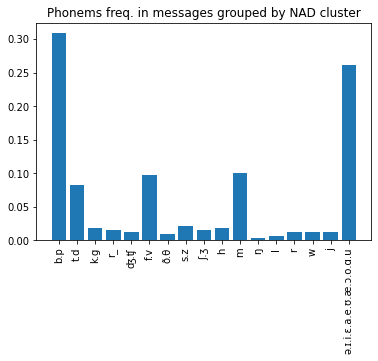

In [ ]:
lst = list(occurrences.items())
lst.sort(key = lambda x: x[0])
y = np.array([k[1] for k in lst])
x = np.array([k[0] for k in lst])
n = np.sum(y)
print(lst)
data = y
plt.bar(x = str_keys[x], height = data/n)
plt.title('Phonems freq. in messages grouped by NAD cluster')
plt.xticks(rotation=90)

In [ ]:
#Counts groups co-occurrences
counts = np.zeros(19)
counts[x] = y
cooccurrences = np.zeros((19,19))
for m in translated_messages:
    for j,l in enumerate(m):
        id = m[j]
        if j!=0:
            prev = m[j-1]
            cooccurrences[id,prev] +=1
        if j<len(m)-1:
            next = m[j+1]
            cooccurrences[id,next] +=1
cooccurrences /= np.expand_dims(counts+1e-5,-1)
print(cooccurrences.shape)

(19, 19)


([<matplotlib.axis.YTick at 0x7ff402e36310>,
 [Text(0, 0, 'b.p'),
  Text(0, 0, 't.d'),
  Text(0, 0, 'k.g'),
  Text(0, 0, 'r_'),
  Text(0, 0, 'ʤ.ʧ'),
  Text(0, 0, 'f.v'),
  Text(0, 0, 'ð.θ'),
  Text(0, 0, 's.z'),
  Text(0, 0, 'ʃ.ʒ'),
  Text(0, 0, 'h'),
  Text(0, 0, 'm'),
  Text(0, 0, 'n'),
  Text(0, 0, 'ŋ'),
  Text(0, 0, 'l'),
  Text(0, 0, 'r'),
  Text(0, 0, 'w'),
  Text(0, 0, 'j'),
  Text(0, 0, 'w_'),
  Text(0, 0, 'ə.ɪ.i.ɛ.a.e.ʊ.æ.ɔ.o.ɑ.u')])

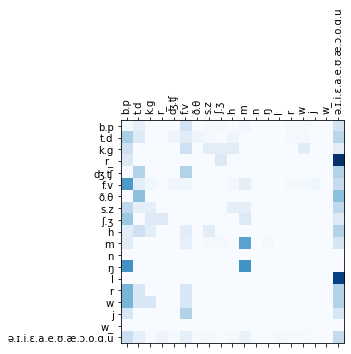

In [ ]:
plt.matshow(cooccurrences[:19,:19], cmap=plt.cm.Blues)
plt.xticks(np.arange(19), str_keys, rotation=90)
plt.yticks(np.arange(19), str_keys)